# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Experimento multicolinealidad en Regresión Lineal</center>
### <center> Práctica Reducción de dimensionalidad  </center>


En esta notebook vamos a analizar el comportamiento de un algoritmo de regresión lineal frente a multicolinealidad en sus variables para evaluar reducir dimensiones

Links:

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://seaborn.pydata.org/tutorial/color_palettes.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html


## Librerias

In [ ]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

## Experimiento

Vamos a trabajar con un conjunto de datos de una empresa que contiene los ingresos (en millones) conseguidos por ventas en 200 regiones y la cantidad de presupuesto (en millones) destinado a anuncios por radio, TV y periódicos en cada una de ellas.

El departamento de ventas quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre las ventas de la empresa. 

Nota: en este notebook vamos a omitir el análisis exploratorio del dataset, los invitamos a practicarlo como tarea ;)

In [ ]:
publicidad=pd.read_csv('./datasets/publicidad_train.csv')
publicidad.head()

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
publicidad.shape

(159, 4)

Veamos las variables en un gráfico de a pares:

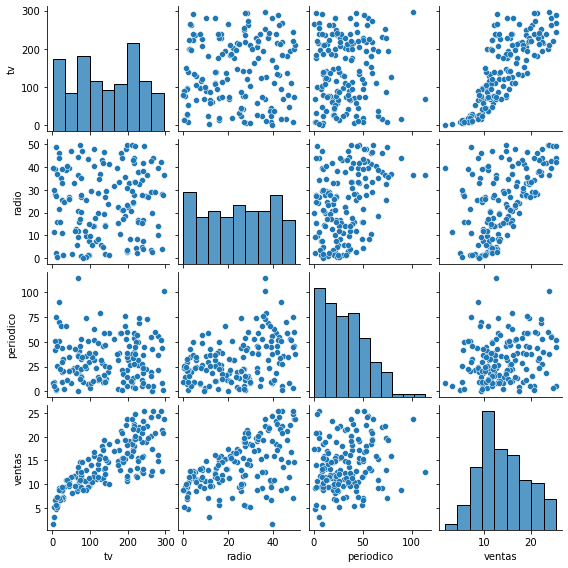

In [ ]:
sns.pairplot(publicidad, height=2)

Analicemos la correlacion original lineal de las variables:

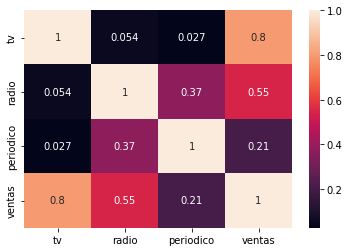

In [ ]:
sns.heatmap(publicidad.corr(),annot=True)

## Modelo Lineal Múltiple

En un modelo lineal múltiple tenemos más de una variable predictora:

$𝑌$ $\approx$ $β_{0}$ + $β_{1}$ * $𝑋_{1}$ + $β_{2}$ * $𝑋_{2}$ + ...+ $β_{n}$ * $𝑋_{n}$

In [ ]:
ds_publicidad_train=pd.read_csv('./datasets/publicidad_train.csv')
ds_publicidad_test=pd.read_csv('./datasets/publicidad_test.csv')

Genero columnas multicorrelacionadas

In [ ]:
import random
  
mu = 0
sigma = 0.5


cant_vars_cor=9
nuevas_variables=[]
campos_nuevos=[]

for i in range(1,cant_vars_cor+1):
  sigma=0.05*i
  var_train=[ random.gauss(mu, sigma) for _ in range(0,ds_publicidad_train.shape[0]) ]  
  var_test=[ random.gauss(mu, sigma) for _ in range(0,ds_publicidad_test.shape[0]) ]  

  nombre_campo="tv_cor_"+str(i)
  campos_nuevos.append(nombre_campo)
  
  ds_publicidad_train[nombre_campo]=ds_publicidad_train['tv']+var_train
  ds_publicidad_test[nombre_campo]=ds_publicidad_test['tv']+var_test

  nuevas_variables.append(nombre_campo)

print(nuevas_variables)

['tv_cor_1', 'tv_cor_2', 'tv_cor_3', 'tv_cor_4', 'tv_cor_5', 'tv_cor_6', 'tv_cor_7', 'tv_cor_8', 'tv_cor_9']


In [ ]:
ds_publicidad_train.head()

,tv,radio,periodico,ventas,tv_cor_1,tv_cor_2,tv_cor_3,tv_cor_4,tv_cor_5,tv_cor_6,tv_cor_7,tv_cor_8,tv_cor_9
0,230.1,37.8,69.2,22.1,230.131975,229.945570,229.895395,230.109549,230.176502,229.922756,229.921860,230.058148,230.780939
1,44.5,39.3,45.1,10.4,44.459449,44.382648,44.683467,44.664859,44.514576,44.569941,43.483596,45.211544,45.086372
2,17.2,45.9,69.3,9.3,17.150082,17.052176,17.285417,17.153993,17.424665,16.782239,17.655568,17.569930,16.539279
3,151.5,41.3,58.5,18.5,151.550622,151.548560,151.341430,151.447633,151.115607,151.587861,151.370316,151.306518,151.095568
4,180.8,10.8,58.4,12.9,180.823577,180.743413,180.692557,180.776816,180.863560,180.748930,181.195693,181.280171,181.071211


In [ ]:
ds_publicidad_test.head()

,tv,radio,periodico,ventas,tv_cor_1,tv_cor_2,tv_cor_3,tv_cor_4,tv_cor_5,tv_cor_6,tv_cor_7,tv_cor_8,tv_cor_9
0,131.7,18.4,34.6,12.9,131.774919,131.728020,131.809664,131.409720,131.470655,131.299334,131.498653,131.714449,131.853947
1,172.5,18.1,30.7,14.4,172.460637,172.678921,172.394450,172.375029,172.329940,172.445511,172.511495,172.799960,172.863584
2,85.7,35.8,49.3,13.3,85.689472,85.664213,85.593616,85.635410,85.402563,85.144675,85.657750,85.293733,85.766461
3,188.4,18.1,25.6,14.9,188.400989,188.462140,188.394837,188.290626,188.362877,187.805779,188.114277,188.711248,187.825406
4,163.5,36.8,7.4,18.0,163.439973,163.523664,163.482415,163.262182,163.486561,163.526853,163.073710,163.346610,163.551006


In [ ]:
ds_publicidad_train.corr()

,tv,radio,periodico,ventas,tv_cor_1,tv_cor_2,tv_cor_3,tv_cor_4,tv_cor_5,tv_cor_6,tv_cor_7,tv_cor_8,tv_cor_9
tv,1.000000,0.054495,0.026783,0.801877,1.000000,0.999999,0.999998,0.999998,0.999996,0.999994,0.999991,0.999989,0.999987
radio,0.054495,1.000000,0.373838,0.546087,0.054469,0.054590,0.054750,0.054545,0.054465,0.054110,0.054393,0.054359,0.053553
periodico,0.026783,0.373838,1.000000,0.205542,0.026783,0.026842,0.026897,0.026566,0.026750,0.026559,0.026863,0.026636,0.025964
ventas,0.801877,0.546087,0.205542,1.000000,0.801882,0.801898,0.801968,0.801906,0.801901,0.801732,0.801898,0.801959,0.801351
tv_cor_1,1.000000,0.054469,0.026783,0.801882,1.000000,0.999999,0.999998,0.999997,0.999996,0.999994,0.999991,0.999989,0.999987
tv_cor_2,0.999999,0.054590,0.026842,0.801898,0.999999,1.000000,0.999998,0.999996,0.999995,0.999993,0.999991,0.999988,0.999985
tv_cor_3,0.999998,0.054750,0.026897,0.801968,0.999998,0.999998,1.000000,0.999997,0.999995,0.999993,0.999989,0.999988,0.999985
tv_cor_4,0.999998,0.054545,0.026566,0.801906,0.999997,0.999996,0.999997,1.000000,0.999993,0.999992,0.999989,0.999988,0.999986
tv_cor_5,0.999996,0.054465,0.026750,0.801901,0.999996,0.999995,0.999995,0.999993,1.000000,0.999989,0.999987,0.999985,0.999983
tv_cor_6,0.999994,0.054110,0.026559,0.801732,0.999994,0.999993,0.999993,0.999992,0.999989,1.000000,0.999986,0.999982,0.999981


### Ajuste del Modelo

Creamos un modelo con todas las variables y evaluamos los resultados

In [ ]:
#Creo un regresor lineal
modelo_lineal_multiple = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente

campos=['tv','radio']+campos_nuevos
medios=ds_publicidad_train[campos]
ventas=ds_publicidad_train['ventas'].values.reshape(-1, 1)

#Ajusto el modelo
modelo_lineal_multiple.fit(medios,ventas)


LinearRegression()

In [ ]:
print(campos)
for i in range(0,len(campos)):
  print(round(modelo_lineal_multiple.coef_[0][i],2))

round(modelo_lineal_multiple.intercept_[0],2)

['tv', 'radio', 'tv_cor_1', 'tv_cor_2', 'tv_cor_3', 'tv_cor_4', 'tv_cor_5', 'tv_cor_6', 'tv_cor_7', 'tv_cor_8', 'tv_cor_9']
-3.02
0.18
3.2
-0.84
-0.58
0.03
0.35
0.41
0.2
0.43
-0.14


2.92

### Evaluación de las métricas del modelo ajustado

In [ ]:
#R2
r2=modelo_lineal_multiple.score(medios,ventas)
print(f"El R2 del modelo multiple es: {r2}")

El R2 del modelo multiple es: 0.8999137986941395


In [ ]:
#RMSE

ventas_pred=modelo_lineal_multiple.predict(ds_publicidad_train[campos])

rmse = metrics.mean_squared_error(
        y_true  = ventas,
        y_pred  = ventas_pred,
        squared = False
       )

print(f"El error (rmse) del modelo multiple es: {rmse}")

El error (rmse) del modelo multiple es: 1.6540343554990273


### Prediccion y Evaluación en datos de testeo

In [ ]:
#Casos nuevos
            
medios_test=ds_publicidad_test[campos]

#Variable a predecir
ventas_test=ds_publicidad_test['ventas'].values.reshape(-1,1)

#Prediccion sobre casos nuevos con mis modelos ya entrenados
ventas_predict_medios    =  modelo_lineal_multiple.predict(medios_test)

In [ ]:
print('Modelo Múltiple:')

mse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_medios,
        squared = True
       )

print(f"El error (mse) de test es: {mse}")


rmse = metrics.mean_squared_error(
        y_true  = ventas_test,
        y_pred  = ventas_predict_medios,
        squared = False
       )

print(f"El error (rmse) de test es: {rmse}")

Modelo Múltiple:
El error (mse) de test es: 2.7335729579707073
El error (rmse) de test es: 1.6533520369149177
